# Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/workspaces/projects/Credit_Classification_End_to_End/Data/final.csv')

In [3]:
df.drop(['Customer_ID','Type_of_Loan'],axis=1,inplace=True)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.322050,10.773792,14.00,24.000000,33.000000,42.000000,100.0
Annual_Income,100000.0,50519.155472,38335.627421,7005.93,19344.270000,37002.580000,71689.680000,277803.0
Num_Bank_Accounts,100000.0,5.403396,2.965084,0.00,3.000000,5.000000,7.000000,100.0
Num_Credit_Card,100000.0,5.533620,2.067078,0.00,4.000000,5.000000,7.000000,11.0
Num_of_Delayed_Payment,100000.0,13.346416,6.292079,0.00,9.000000,14.000000,18.000000,98.0
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.00,28.052567,32.305784,36.496663,50.0
Total_EMI_per_month,100000.0,111.963193,179.435831,0.00,29.337299,66.619336,147.896043,4991.0
Delay_from_due_date,100000.0,21.068780,14.860104,-5.00,10.000000,18.000000,28.000000,67.0
Credit_History_Age_Formated,100000.0,221.180115,99.071581,1.00,146.000000,219.000000,301.000000,404.0
Auto_Loan,100000.0,0.305600,0.460663,0.00,0.000000,0.000000,1.000000,1.0


In [5]:
df['Missed_Payment_Day'] = 0
for row in df.index:
    if df.loc[row, 'Delay_from_due_date'] > 0:
        df.loc[row, 'Missed_Payment_Day'] = 1

In [6]:
df.drop(['Delay_from_due_date'],axis=1,inplace=True)

In [7]:
df['Payment_of_Min_Amount_Yes'] =df['Payment_of_Min_Amount']
df.drop(['Payment_of_Min_Amount'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Age                          100000 non-null  float64
 1   Annual_Income                100000 non-null  float64
 2   Num_Bank_Accounts            100000 non-null  float64
 3   Num_Credit_Card              100000 non-null  float64
 4   Num_of_Delayed_Payment       100000 non-null  float64
 5   Credit_Utilization_Ratio     100000 non-null  float64
 6   Total_EMI_per_month          100000 non-null  float64
 7   Credit_Score                 100000 non-null  object 
 8   Credit_History_Age_Formated  100000 non-null  float64
 9   Auto_Loan                    100000 non-null  int64  
 10  Credit-Builder_Loan          100000 non-null  int64  
 11  Personal_Loan                100000 non-null  int64  
 12  Home_Equity_Loan             100000 non-null  int64  
 13  

In [9]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [14]:
import sklearn
print(sklearn.__version__)

1.6.1


In [13]:
df

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score,Credit_History_Age_Formated,Auto_Loan,Credit-Builder_Loan,Personal_Loan,Home_Equity_Loan,Not_Specified,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan,Missed_Payment_Day,Payment_of_Min_Amount_Yes
0,23.0,19114.12,3.0,4.0,7.0,26.822620,49.574949,Good,265.0,1,1,1,1,0,0,0,0,0,1,No
1,23.0,19114.12,3.0,4.0,6.0,31.944960,49.574949,Good,266.0,1,1,1,1,0,0,0,0,0,0,No
2,23.0,19114.12,3.0,4.0,7.0,28.609352,49.574949,Good,267.0,1,1,1,1,0,0,0,0,0,1,No
3,23.0,19114.12,3.0,4.0,4.0,31.377862,49.574949,Good,268.0,1,1,1,1,0,0,0,0,0,1,No
4,23.0,19114.12,3.0,4.0,6.0,24.797347,49.574949,Good,269.0,1,1,1,1,0,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,4.0,6.0,7.0,34.663572,35.104023,Poor,378.0,1,0,0,0,0,0,1,0,0,1,No
99996,25.0,39628.99,4.0,6.0,7.0,40.565631,35.104023,Poor,379.0,1,0,0,0,0,0,1,0,0,1,No
99997,25.0,39628.99,4.0,6.0,6.0,41.255522,35.104023,Poor,380.0,1,0,0,0,0,0,1,0,0,1,No
99998,25.0,39628.99,4.0,6.0,6.4,33.638208,35.104023,Standard,381.0,1,0,0,0,0,0,1,0,0,1,No


In [10]:
X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Define the numerical and categorical features
numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [12]:
# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [15]:
'''import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier())])

# Define a range of n_estimators to try
n_estimators_values = [10, 50, 100, 150, 200]

# Lists to store results
test_accuracies = []

# Iterate over different n_estimators values
for n_estimators in n_estimators_values:
    # Set the current n_estimators value in the classifier step of the pipeline
    pipeline.set_params(classifier__n_estimators=n_estimators)

    # Perform cross-validation on the training data
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    test_predictions = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    # Append test accuracy to the list
    test_accuracies.append(test_accuracy)

    # Print the results for each n_estimators
    print(f'n_estimators: {n_estimators} | CV Accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f} | Test Accuracy: {test_accuracy:.4f}')'''

"import matplotlib.pyplot as plt\nimport numpy as np\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import cross_val_score\n\n# Define the pipeline\npipeline = Pipeline(steps=[('preprocessor', preprocessor),\n                             ('classifier', RandomForestClassifier())])\n\n# Define a range of n_estimators to try\nn_estimators_values = [10, 50, 100, 150, 200]\n\n# Lists to store results\ntest_accuracies = []\n\n# Iterate over different n_estimators values\nfor n_estimators in n_estimators_values:\n    # Set the current n_estimators value in the classifier step of the pipeline\n    pipeline.set_params(classifier__n_estimators=n_estimators)\n\n    # Perform cross-validation on the training data\n    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)\n\n    # Fit the pipeline on the training data\n    pipeline.fit(X_train, y_train)\n\n    # Predict on the test set\n    test_predictions = pipeline.predic

In [16]:
# Plot the results
'''plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, test_accuracies, marker='o', linestyle='-')
plt.title('Test Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()'''

"plt.figure(figsize=(10, 6))\nplt.plot(n_estimators_values, test_accuracies, marker='o', linestyle='-')\nplt.title('Test Accuracy vs. Number of Estimators')\nplt.xlabel('Number of Estimators')\nplt.ylabel('Test Accuracy')\nplt.grid(True)\nplt.show()"

## Final Pipeline

In [51]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(bootstrap=True, n_estimators=150,criterion='entropy',max_depth=20,min_samples_leaf=1,min_samples_split=2,n_jobs=-1,))
])

# Perform cross-validation on the training data
cv_scores = cross_val_score(final_pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

/workspaces/projects/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [52]:
# Fit the pipeline on the training data
final_pipeline.fit(X_train, y_train)

# Predict on the test set
test_predictions = final_pipeline.predict(X_test)

# Calculate other metrics
train_predictions = final_pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the results for each n_estimators
print(f'CV Accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}')
print(f'Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}')

CV Accuracy: 0.7608 +/- 0.0019
Train Accuracy: 0.9409 | Test Accuracy: 0.7725


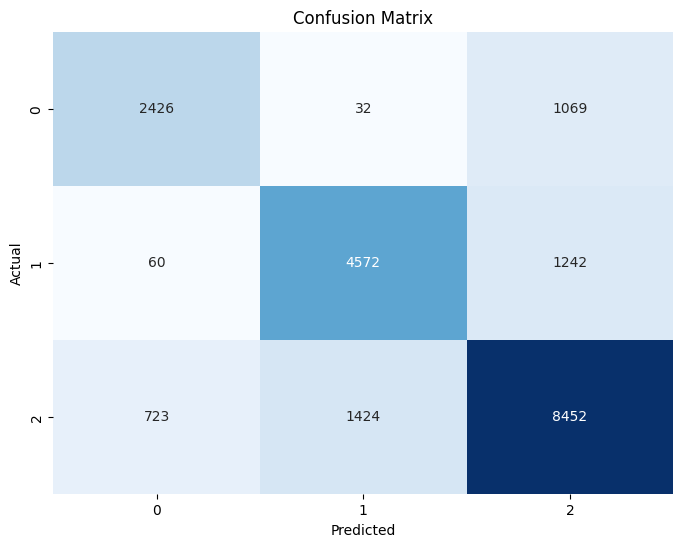

In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
# Classification Report
report = classification_report(y_test, test_predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        Good       0.76      0.69      0.72      3527
        Poor       0.76      0.78      0.77      5874
    Standard       0.79      0.80      0.79     10599

    accuracy                           0.77     20000
   macro avg       0.77      0.75      0.76     20000
weighted avg       0.77      0.77      0.77     20000



In [55]:
import pickle
import gzip
# Save the model
with gzip.open('final_pipeline.pkl.gz', 'wb') as file:
    pickle.dump(final_pipeline, file)

In [56]:
with gzip.open('/workspaces/projects/Credit_Classification_End_to_End/Apps/final_pipeline.pkl.gz', 'rb') as file:
    loaded_data = pickle.load(file)
loaded_data

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Credit_History_Age_Formated'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Payment_of_Min_Amount_Yes'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        n_estimators=150, n_jobs=-1))])

In [4]:
import os
import pickle
import gzip
current_path = os.getcwd()
with gzip.open('/workspaces/projects/Credit_Classification_End_to_End/Apps/final_pipeline.pkl.gz', 'rb') as file:
    model = pickle.load(file)

In [5]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Credit_History_Age_Formated'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Payment_of_Min_Amount_Yes'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        n_estimators=150, n_jobs=-1))])

In [6]:
importance = model.named_steps['classifier'].feature_importances_            
preprocessor = model.named_steps['preprocessor']

# Assuming the preprocessor has a 'get_feature_names_out' method
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['num__Age', 'num__Annual_Income', 'num__Num_Bank_Accounts',
       'num__Num_Credit_Card', 'num__Num_of_Delayed_Payment',
       'num__Credit_Utilization_Ratio', 'num__Total_EMI_per_month',
       'num__Credit_History_Age_Formated',
       'cat__Payment_of_Min_Amount_Yes_No',
       'cat__Payment_of_Min_Amount_Yes_Yes'], dtype=object)